In [26]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

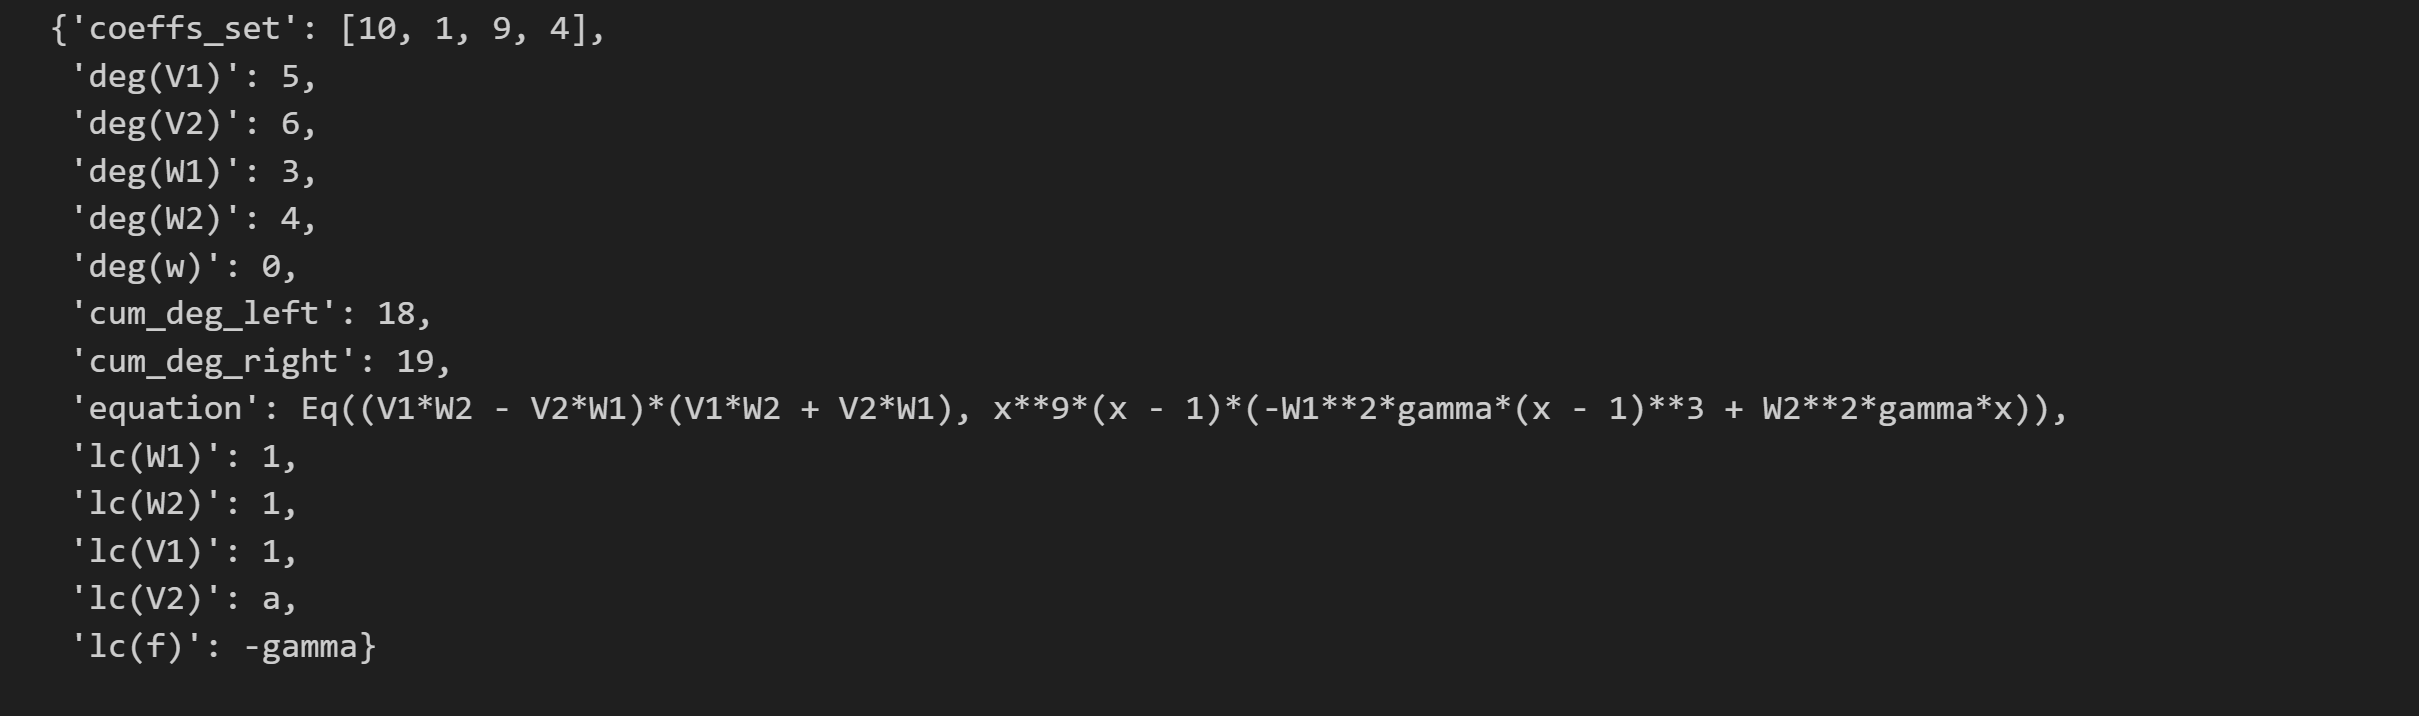

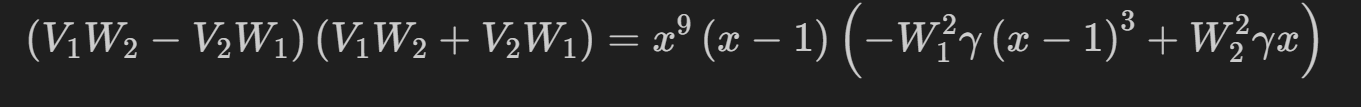

In [27]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [28]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

In [29]:
x, x0, x1, w, gamma = smp.symbols('x x0 x1 w gamma')

In [30]:
eq_1 = smp.Poly(w * gamma * x**9, x)
eq_2 = smp.Poly((1 / w) * ((x - 1)*(x - x0)**8 * x - (x - x1)**6 * (x - 1)**4), x)

In [31]:
eq_1

Poly(gamma*w*x**9, x, domain='ZZ[w,gamma]')

In [32]:
eq_2

Poly((-8*x0 + 6*x1 + 3)/w*x**9 + (28*x0**2 + 8*x0 - 15*x1**2 - 24*x1 - 6)/w*x**8 + (-56*x0**3 - 28*x0**2 + 20*x1**3 + 60*x1**2 + 36*x1 + 4)/w*x**7 + (70*x0**4 + 56*x0**3 - 15*x1**4 - 80*x1**3 - 90*x1**2 - 24*x1 - 1)/w*x**6 + (-56*x0**5 - 70*x0**4 + 6*x1**5 + 60*x1**4 + 120*x1**3 + 60*x1**2 + 6*x1)/w*x**5 + (28*x0**6 + 56*x0**5 - x1**6 - 24*x1**5 - 90*x1**4 - 80*x1**3 - 15*x1**2)/w*x**4 + (-8*x0**7 - 28*x0**6 + 4*x1**6 + 36*x1**5 + 60*x1**4 + 20*x1**3)/w*x**3 + (x0**8 + 8*x0**7 - 6*x1**6 - 24*x1**5 - 15*x1**4)/w*x**2 + (-x0**8 + 4*x1**6 + 6*x1**5)/w*x - x1**6/w, x, domain='ZZ(x0,x1,w)')

In [33]:
V1_m = (eq_1 + eq_2)/2
V2 = (-eq_1 + eq_2)/2

In [34]:
V1_m

x**9*(gamma*w**2 - 8*x0 + 6*x1 + 3)/(2*w) + x**8*(28*x0**2 + 8*x0 - 15*x1**2 - 24*x1 - 6)/(2*w) + x**7*(-56*x0**3 - 28*x0**2 + 20*x1**3 + 60*x1**2 + 36*x1 + 4)/(2*w) + x**6*(70*x0**4 + 56*x0**3 - 15*x1**4 - 80*x1**3 - 90*x1**2 - 24*x1 - 1)/(2*w) + x**5*(-56*x0**5 - 70*x0**4 + 6*x1**5 + 60*x1**4 + 120*x1**3 + 60*x1**2 + 6*x1)/(2*w) + x**4*(28*x0**6 + 56*x0**5 - x1**6 - 24*x1**5 - 90*x1**4 - 80*x1**3 - 15*x1**2)/(2*w) + x**3*(-8*x0**7 - 28*x0**6 + 4*x1**6 + 36*x1**5 + 60*x1**4 + 20*x1**3)/(2*w) + x**2*(x0**8 + 8*x0**7 - 6*x1**6 - 24*x1**5 - 15*x1**4)/(2*w) + x*(-x0**8 + 4*x1**6 + 6*x1**5)/(2*w) - x1**6/(2*w)

In [35]:
V2

x**9*(-gamma*w**2 - 8*x0 + 6*x1 + 3)/(2*w) + x**8*(28*x0**2 + 8*x0 - 15*x1**2 - 24*x1 - 6)/(2*w) + x**7*(-56*x0**3 - 28*x0**2 + 20*x1**3 + 60*x1**2 + 36*x1 + 4)/(2*w) + x**6*(70*x0**4 + 56*x0**3 - 15*x1**4 - 80*x1**3 - 90*x1**2 - 24*x1 - 1)/(2*w) + x**5*(-56*x0**5 - 70*x0**4 + 6*x1**5 + 60*x1**4 + 120*x1**3 + 60*x1**2 + 6*x1)/(2*w) + x**4*(28*x0**6 + 56*x0**5 - x1**6 - 24*x1**5 - 90*x1**4 - 80*x1**3 - 15*x1**2)/(2*w) + x**3*(-8*x0**7 - 28*x0**6 + 4*x1**6 + 36*x1**5 + 60*x1**4 + 20*x1**3)/(2*w) + x**2*(x0**8 + 8*x0**7 - 6*x1**6 - 24*x1**5 - 15*x1**4)/(2*w) + x*(-x0**8 + 4*x1**6 + 6*x1**5)/(2*w) - x1**6/(2*w)

In [36]:
solution_w = smp.solve(V1_m.subs(x, x0), w)
solution = solution_w[0]

In [37]:
print(solution)

-sqrt(1/(gamma*x0**9))*(x0 - 1)**2*(x0 - x1)**3


In [38]:
V_q = (V1_m * V1_m)

In [39]:
V_q = V_q.subs(w, solution).simplify()

In [40]:
p1 = smp.Poly((x-x0)**2,x)

quotient, remainder = smp.div(V_q, p1)

In [41]:
V1 = quotient

In [42]:
# V1.simplify()

In [43]:
remainder

Poly(0, x0, x, x1, 1/(4*x0**19 - 24*x0**18*x1 - 16*x0**18 + 60*x0**17*x1**2 + 96*x0**17*x1 + 24*x0**17 - 80*x0**16*x1**3 - 240*x0**16*x1**2 - 144*x0**16*x1 - 16*x0**16 + 60*x0**15*x1**4 + 320*x0**15*x1**3 + 360*x0**15*x1**2 + 96*x0**15*x1 + 4*x0**15 - 24*x0**14*x1**5 - 240*x0**14*x1**4 - 480*x0**14*x1**3 - 240*x0**14*x1**2 - 24*x0**14*x1 + 4*x0**13*x1**6 + 96*x0**13*x1**5 + 360*x0**13*x1**4 + 320*x0**13*x1**3 + 60*x0**13*x1**2 - 16*x0**12*x1**6 - 144*x0**12*x1**5 - 240*x0**12*x1**4 - 80*x0**12*x1**3 + 24*x0**11*x1**6 + 96*x0**11*x1**5 + 60*x0**11*x1**4 - 16*x0**10*x1**6 - 24*x0**10*x1**5 + 4*x0**9*x1**6), gamma, domain='ZZ')

In [44]:
Z = smp.Poly(V1 - x**10 * (x - 1),x)

In [45]:
solution_gamma = smp.solve(Z.subs(x, x1), gamma)

KeyboardInterrupt: 

In [ ]:
solution_gamma = solution_gamma[0]
solution_gamma

4*x0**9*x1**8*(x0**4*x1 - x0**4 - 4*x0**3*x1 + 4*x0**3 + 6*x0**2*x1 - 6*x0**2 - 4*x0*x1 + 4*x0 + x1 - 1)/(x0**26*x1**2 - 2*x0**26*x1 + x0**26 - 8*x0**25*x1**3 + 16*x0**25*x1**2 - 8*x0**25*x1 + 28*x0**24*x1**4 - 56*x0**24*x1**3 + 28*x0**24*x1**2 - 56*x0**23*x1**5 + 112*x0**23*x1**4 - 56*x0**23*x1**3 + 70*x0**22*x1**6 - 140*x0**22*x1**5 + 70*x0**22*x1**4 - 56*x0**21*x1**7 + 112*x0**21*x1**6 - 56*x0**21*x1**5 + 28*x0**20*x1**8 - 56*x0**20*x1**7 + 28*x0**20*x1**6 - 6*x0**19*x1**9 + 14*x0**19*x1**8 - 8*x0**19*x1**7 - 11*x0**18*x1**10 + 2*x0**18*x1**9 + 9*x0**18*x1**8 + 30*x0**17*x1**11 + 18*x0**17*x1**10 - 36*x0**17*x1**9 - 12*x0**17*x1**8 - 40*x0**16*x1**12 - 80*x0**16*x1**11 + 48*x0**16*x1**10 + 64*x0**16*x1**9 + 8*x0**16*x1**8 + 30*x0**15*x1**13 + 130*x0**15*x1**12 + 20*x0**15*x1**11 - 132*x0**15*x1**10 - 46*x0**15*x1**9 - 2*x0**15*x1**8 - 12*x0**14*x1**14 - 108*x0**14*x1**13 - 120*x0**14*x1**12 + 120*x0**14*x1**11 + 108*x0**14*x1**10 + 12*x0**14*x1**9 + 2*x0**13*x1**15 + 46*x0**13*x1**1

In [22]:
Z = Z.subs(gamma, solution_gamma)

In [ ]:
p2 = smp.Poly((x - x1)**6, x)

quotient, remainder = smp.div(Z, p2)

UnificationFailed: Cannot unify ZZ with ZZ[x1], given (x0, x, x1, 1/(4*x0**19 - 24*x0**18*x1 - 16*x0**18 + 60*x0**17*x1**2 + 96*x0**17*x1 + 24*x0**17 - 80*x0**16*x1**3 - 240*x0**16*x1**2 - 144*x0**16*x1 - 16*x0**16 + 60*x0**15*x1**4 + 320*x0**15*x1**3 + 360*x0**15*x1**2 + 96*x0**15*x1 + 4*x0**15 - 24*x0**14*x1**5 - 240*x0**14*x1**4 - 480*x0**14*x1**3 - 240*x0**14*x1**2 - 24*x0**14*x1 + 4*x0**13*x1**6 + 96*x0**13*x1**5 + 360*x0**13*x1**4 + 320*x0**13*x1**3 + 60*x0**13*x1**2 - 16*x0**12*x1**6 - 144*x0**12*x1**5 - 240*x0**12*x1**4 - 80*x0**12*x1**3 + 24*x0**11*x1**6 + 96*x0**11*x1**5 + 60*x0**11*x1**4 - 16*x0**10*x1**6 - 24*x0**10*x1**5 + 4*x0**9*x1**6), 4*x0**9*x1**8*(x0**4*x1 - x0**4 - 4*x0**3*x1 + 4*x0**3 + 6*x0**2*x1 - 6*x0**2 - 4*x0*x1 + 4*x0 + x1 - 1)/(x0**26*x1**2 - 2*x0**26*x1 + x0**26 - 8*x0**25*x1**3 + 16*x0**25*x1**2 - 8*x0**25*x1 + 28*x0**24*x1**4 - 56*x0**24*x1**3 + 28*x0**24*x1**2 - 56*x0**23*x1**5 + 112*x0**23*x1**4 - 56*x0**23*x1**3 + 70*x0**22*x1**6 - 140*x0**22*x1**5 + 70*x0**22*x1**4 - 56*x0**21*x1**7 + 112*x0**21*x1**6 - 56*x0**21*x1**5 + 28*x0**20*x1**8 - 56*x0**20*x1**7 + 28*x0**20*x1**6 - 6*x0**19*x1**9 + 14*x0**19*x1**8 - 8*x0**19*x1**7 - 11*x0**18*x1**10 + 2*x0**18*x1**9 + 9*x0**18*x1**8 + 30*x0**17*x1**11 + 18*x0**17*x1**10 - 36*x0**17*x1**9 - 12*x0**17*x1**8 - 40*x0**16*x1**12 - 80*x0**16*x1**11 + 48*x0**16*x1**10 + 64*x0**16*x1**9 + 8*x0**16*x1**8 + 30*x0**15*x1**13 + 130*x0**15*x1**12 + 20*x0**15*x1**11 - 132*x0**15*x1**10 - 46*x0**15*x1**9 - 2*x0**15*x1**8 - 12*x0**14*x1**14 - 108*x0**14*x1**13 - 120*x0**14*x1**12 + 120*x0**14*x1**11 + 108*x0**14*x1**10 + 12*x0**14*x1**9 + 2*x0**13*x1**15 + 46*x0**13*x1**14 + 132*x0**13*x1**13 - 20*x0**13*x1**12 - 130*x0**13*x1**11 - 30*x0**13*x1**10 + x0**12*x1**16 - 8*x0**12*x1**15 - 64*x0**12*x1**14 - 48*x0**12*x1**13 + 80*x0**12*x1**12 + 40*x0**12*x1**11 - 4*x0**11*x1**17 - 8*x0**11*x1**16 + 12*x0**11*x1**15 + 36*x0**11*x1**14 - 18*x0**11*x1**13 - 30*x0**11*x1**12 + 6*x0**10*x1**18 + 32*x0**10*x1**17 + 28*x0**10*x1**16 - 8*x0**10*x1**15 - 4*x0**10*x1**14 + 12*x0**10*x1**13 - 4*x0**9*x1**19 - 48*x0**9*x1**18 - 112*x0**9*x1**17 - 56*x0**9*x1**16 + 2*x0**9*x1**15 - 2*x0**9*x1**14 + x0**8*x1**20 + 32*x0**8*x1**19 + 168*x0**8*x1**18 + 224*x0**8*x1**17 + 70*x0**8*x1**16 - 8*x0**7*x1**20 - 112*x0**7*x1**19 - 336*x0**7*x1**18 - 280*x0**7*x1**17 - 56*x0**7*x1**16 + 28*x0**6*x1**20 + 224*x0**6*x1**19 + 420*x0**6*x1**18 + 224*x0**6*x1**17 + 28*x0**6*x1**16 - 56*x0**5*x1**20 - 280*x0**5*x1**19 - 336*x0**5*x1**18 - 112*x0**5*x1**17 - 8*x0**5*x1**16 + 70*x0**4*x1**20 + 224*x0**4*x1**19 + 168*x0**4*x1**18 + 32*x0**4*x1**17 + x0**4*x1**16 - 56*x0**3*x1**20 - 112*x0**3*x1**19 - 48*x0**3*x1**18 - 4*x0**3*x1**17 + 28*x0**2*x1**20 + 32*x0**2*x1**19 + 6*x0**2*x1**18 - 8*x0*x1**20 - 4*x0*x1**19 + x1**20)) generators

In [ ]:
remainder 

In [21]:
f = quotient

In [24]:
coeffs = f.all_coeffs()

In [ ]:
print(coeffs[1])

In [ ]:
eq1 = smp.Eq(coeffs[0], 0)
eq2 = smp.Eq(coeffs[1], -gamma)

# Solve the system of equations for w
solution_gamma = smp.solve([eq1, eq2], gamma)
gamma_solution = solution_gamma[0][0]
gamma_solution

In [27]:
f = f.subs(gamma, gamma_solution).simplify()

In [ ]:
print(f)

In [29]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [ ]:
f_main = factor_coeffs(f, x)
f

In [ ]:
f_main.as_expr()

In [32]:
calc = MagmaCalculator()

In [33]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [34]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [35]:
def curve_search(rang):
    for value in range(rang[0],rang[1]):
        f = f_main.subs(x0,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [37]:
curve_search([10,20])

In [ ]:
print(smp.latex(f.as_expr()))